In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def genData():
  center1 = np.array([4,4])
  center2 = np.array([8,10])

  m1 = 10
  m2 = 10

  # Generate data for center 1
  X1 = center1 + np.random.rand(m1, center1.shape[0])*3
  Y1 = np.zeros(m1)

  # Generate data for center 2
  X2 = center2 + np.random.rand(m2, center2.shape[0])*3
  Y2 = np.ones(m2)
  
  X3 = center1 + np.random.rand(1, center1.shape[0])*6
  Y3 = np.ones(1)

  X = np.concatenate((X1, X2), axis=0)
  Y = np.concatenate((Y1, Y2), axis=0)

  X = np.concatenate((X, X3), axis=0)
  Y = np.concatenate((Y, Y3), axis=0)
  
  return X,Y

In [0]:
class kNN:
  # m is #data
  # n is #feature
  # data_X: m x n (X is feature vector n Dimension)
  # data_Y: m x 1 (Y is label = 0,1,2,... #label - 1)
  def __init__(self,
              data_X,
              data_Y,
              k = 2):
    self.data_X = data_X
    self.data_Y = data_Y
    self.k = k
    
  # point: n x 1
  def get_distance(self, target):
    return np.sqrt(np.sum(np.square(self.data_X - target), axis = 1))
  
  def get_k_nearest_neighbors(self, target):
    indexes = np.argsort(self.get_distance(target))
    
    return indexes[:self.k]
  
  # point: n x 1
  def weight(self, distance):
    sigma = .5
    return np.exp(-distance**2 / sigma)
  
  # point: n x 1
  def get_label(self, target):
    distances = self.get_distance(target)
    indexes = np.argsort(distances)
    
    k_neighbors_index = indexes[:self.k]
    
    label_weight = np.zeros(self.k)
    
    for index in k_neighbors_index:
      label_weight[int(self.data_Y[index])] += self.weight(distances[index])
    
    return np.argmax(label_weight)
  
  # target is set of data point: (#data x #feature) matrix
  def predict(self, target):
    labels = []
    for i in range(target.shape[0]):
      labels.append(self.get_label(target[i]))
      
    return np.array(labels)

In [0]:
X_train,Y_train = genData() 

In [6]:
model = kNN(X_train, Y_train, 2)
result = model.predict(np.array([[4,4],[5,5],[6,6],[7,7]]))
print(result)

[0 0 0 0]


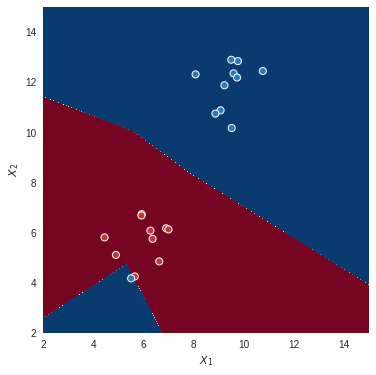

In [7]:
# np.mgrid : Return grid point contain 2:15 x 2:15, with each point is represented by 2 feature -> return tensor 2 x 2:15 x 2:15 
X1_grid, X2_grid = np.mgrid[2:15:.01, 2:15:.01] 

# np.ravel : flatten tensor
grid = np.c_[X1_grid.ravel(), X2_grid.ravel()]
probs = model.predict(grid)
probs = probs.reshape(X1_grid.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X1_grid, X2_grid, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax.scatter(X_train[:,0], X_train[:, 1], c=Y_train[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(2, 15), ylim=(2, 15),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()